<a href="https://colab.research.google.com/github/xuhu357/DataAnalysis/blob/master/ch02_%EC%82%AC%EB%A1%80%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving usagov_bitly_data2012-03-16-1331923249.txt to usagov_bitly_data2012-03-16-1331923249.txt
User uploaded file "usagov_bitly_data2012-03-16-1331923249.txt" with length 1598282 bytes


In [0]:
# path 지정
path = 'usagov_bitly_data2012-03-16-1331923249.txt'

In [3]:
# 지정한 path의 파일에서 한줄 읽어서 한번 출력해보자
open(path).readline() 

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [0]:
# json을 키:값 형태의 파이썬 사전(dictionary)로 변환해보자~
# 전체 파일을 읽어들이기

import json
path = 'usagov_bitly_data2012-03-16-1331923249.txt'

records = [json.loads(line) for line in open(path)]

In [5]:
# 개수 확인해보자
len(records)

3560

In [6]:
# 그중의 하나를 출력해보자.
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
# records[0]에서 tz, 즉 timezone 키에 해당하는 값을 출력해보자
records[0]['tz']

'America/New_York'

In [8]:
# 전체 파일에서 tz을 모두 가져와 보자. (순수한 파이썬 버전)

time_zones = [ rec['tz'] for rec in records ]

KeyError: ignored

원인분석: tz 에서 keyError라는 것은 모든 record에 tz이 반드시 있지 않다는 말이다.  

그럼 tz이 있는 record만 출력하자, how? 조건 하나만 추가하면 끝~

In [0]:
time_zones = [ rec['tz'] for rec in records if 'tz' in rec]

In [13]:
# 결과 출력해보자~, 앞의 10개만 출력하고 싶으면 time_zones[:10] 요렇게
time_zones[0:10] 

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

결과를 보면, value값이 비어있는(' ') 부분도 있다. 

또 tz에 여러가지 결과가 다 있는데, 각각 몇개씩 있는지 궁금하다면 아래와 같이 개수를 알아낼수 있음.

만들고 싶은 결과는 대략, 
America/New_York: xx개
America/Denver: yy개


In [0]:
# 개수를 세는 함수를 만들자
def get_counts(data):
  counts = {}
  for x in data:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

위의 방식은 야매로 내가 직접 함수를 만들어서 개수를 세는 방식

---


그럼 파이썬 라이브러리에서 제공하는 방법은 없을까? 당연히 있음.


In [0]:
from collections import defaultdict

def get_counts2(data):
  counts = defaultdict(int)
  for x in data:
    counts[x] += 1
  return counts

In [0]:
counts = get_counts(time_zones)

In [17]:
# America/New_York 이 몇개 있는지를 알려면~
counts['America/New_York']

1251

In [0]:
counts2 = get_counts2(time_zones)

In [21]:
# counts2 에서 America/New_York 이 몇개인지 확인
counts2['America/New_York']

1251

**결과: ** 위의 결과와 동일하게 나오는걸 확인 가능.

### 가장 많이 등장하는 상위 10개 표준 시간대(tz)를 알고 싶다면, 어떻게 할까? top 10?


In [0]:
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]

In [19]:
top_counts(counts, 10)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

결과를 보면 521번 등장한 애가 ' ' 빈값이 있음~

나쁘지 않음, 그런데 파이썬 라이브러리 중 Counter 클래스를 쓰면 몇줄이면 끝~~~GO

In [0]:
# 일단 Counter 클래스를 불러들이자
from collections import Counter

In [0]:
# 개수를 세자
counts = Counter(time_zones)

In [24]:
# 상위 10개를 원한다고 했지, 알았어~
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

**결론1: 아는것만큼 보인다~.** Counter 같은 클래스가 분명히 있음에도, 모르면 위에서처럼 get_counts(), get_counts2() 처럼 낑낑 거려야 함~

---

**결론2: 많이 주어 들어야 함~**

근데, 아직 **pandas**를 안써봤는데~~~ 이번에는 **pandas**를 사용해보자

간단히 설명하면, pandas는 Excel과 비슷하다고 생각하면 됨~


*   DataFrame: SpreadSheet



In [0]:
# pandas에서 DataFrame와 series를 불러들이기
from pandas import DataFrame, Series

In [0]:
# pandas는 간단하게 pd라고 불러주자
import pandas as pd

In [0]:
# 썩~위에서 보았었던 records를 DataFrame으로 만들기
frame = DataFrame(records)

In [28]:
# frame의 정보를 알고 싶다면 
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [0]:
# tz가 모두 몇개 있는지 궁금하다면
tz_counts = frame['tz'].value_counts()

In [31]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
America/Puerto_Rico                 10
Europe/Oslo                         10
Europe/Helsinki                     10
Europe/Prague            

In [32]:
# 상위 10개를 원한다면
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

정리해보면, pandas를 쓰면 한줄이면 끝~How?


---

frame['tz'].value_counts()[:10], 이렇게




In [0]:
# 비워 있는 값을, fillna로 대체하기
clean_tz = frame['tz'].fillna('Missing') # 'tz'란 항목이 아예 없었던 애들은 그 자리에 'Missing'이란 값을 넣자
clean_tz[clean_tz == ''] = 'Unknown' # 'tz' 값이 없는것은 아닌데 ''이것으로 된 애들은 'Unknown'이란 값으로 대체

In [0]:
tz_counts = clean_tz.value_counts()

In [38]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

눈으로 확인하는 것은 데이터를 확인하는 제일 좋은 방법, 

In [0]:
%matplotlib inline

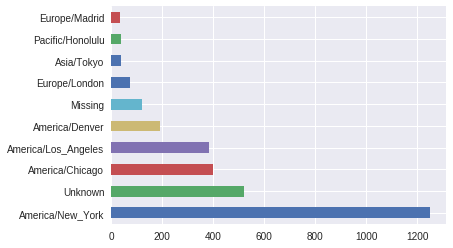

In [40]:
tz_counts[:10].plot(kind='barh', rot=0)

In [41]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


tz는 여기까지 하고, 이번에는 다른 필드를 보자~'a' 라는 column에는 뭐가 있을까?


In [42]:
# 3440개의 데이터를 다 볼수 없으니 일단 앞의 10개를 출력해보자~
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

관측해보면, 앞에 부분은 브라우저 종류를 알려주는 것이다. 그럼 앞의 부분만 잘라내보자~

In [0]:
results = Series([x.split()[0] for x in frame.a.dropna()]) # 뭔말 일까??? 아직 생소하다면 정상!!! 파이썬을 잘 모르는데, 이걸 한눈에 알아본다면 당신은 천재~

In [46]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

잘라내기 성공했으니, 각각 몇개 있는지 개수를 세볼까요? 어떻게 했드라~?

In [47]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

## 윈도우 사용자와 비윈도우 사용자로 분리해보자~

In [49]:
frame['a'][:5]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

()안에 보면, 'Windows' 글자가 있는지 없는지로 판단 가능. Let's do it.

방법: 

1.   혹시 모르니 null인 항목은 제외
2.   frame의 'a' 키에 해당하는 값에 'Windows' 가 포함되어 있다면 Windows, 아니면 Not Windows



In [0]:
# frame 중 not null 인 frame만 선택
cframe = frame[frame.a.notnull()]

In [0]:
import numpy as np


In [0]:
operating_systems = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows') 

In [53]:
operating_systems[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

이번에는 tz 와 os 를 함께 고려해보자


In [0]:
by_tz_os = cframe.groupby(['tz', operating_systems])

In [0]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [56]:
len(agg_counts)

97

In [57]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


전체 표준시간대의 순위를 모아보자. 

In [0]:
indexer = agg_counts.sum(1).argsort()

In [64]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [0]:
count_subset = agg_counts.take(indexer)[-10:]

In [67]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


### 잠깐 take() 함수는 어떤 작용하는것일까? 뭘 취한다는 뜻같은데~~

In [0]:
df2 = pd.DataFrame([('falcon', 'bird',    389.0),
                    ('parrot', 'bird',     24.0),
                    ('lion',   'mammal',   80.5),
                    ('monkey', 'mammal', np.nan)],
                    columns=['name', 'class', 'max_speed'],
                   index=[0, 2, 3, 1])

In [69]:
df2

,name,class,max_speed
0,falcon,bird,389.0
2,parrot,bird,24.0
3,lion,mammal,80.5
1,monkey,mammal,NaN


In [71]:
df2.take([0, 3]) # 원본 데이터의 row index [0, 3] 해당 값 취한다는 말.

,name,class,max_speed
0,falcon,bird,389.0
1,monkey,mammal,NaN


In [74]:
df2.take([1, 2], axis=1) # axis 가 1 이면, column을 말하고, 그럼 column에서 index가 [1, 2] 인 해당 값을 취한다는 말.

,class,max_speed
0,bird,389.0
2,bird,24.0
3,mammal,80.5
1,mammal,NaN


퀴즈: df2.take([-1, -2]) 의 결과는 무엇일까요?

In [0]:
df2.take([-1, -2])  # it's QUIZ~!!!

일단 그림 그력서 확인해 볼까요?


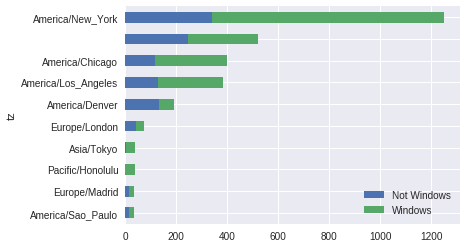

In [75]:
count_subset.plot(kind='barh', stacked=True)

Wow~

그런데,  그림은 나왔는데 Windows vs Not Windows 비율 확인하기 어려움.
그래서 정규화가 필요.

In [0]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0) 

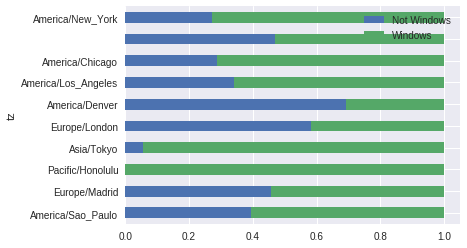

In [77]:
normed_subset.plot(kind='barh', stacked=True)

이렇게도 할 수 있구나~~ 굿굿